<a href="https://colab.research.google.com/github/thanadolch/data_viz/blob/main/tree_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import os
import datetime as dt
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import time

In [3]:
path = '/content/drive/My Drive/DVZ'

In [4]:
search_request = pd.read_csv(os.path.join(path,'search_request.csv'))
search_request.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.6347,101.463
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.8009,102.534
2,2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-J7...,NaN,NaN,5ci1eo4v5u9dha4ppgu94ue7p6,8,13.7383,100.371
3,3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,Mozilla/5.0 (Linux; Android 7.1.1; SM-N950F Bu...,NaN,NaN,39n535qgje9kpojp0grhfj8umk,12,12.6669,101.861
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.2372,99.88


In [5]:
search_request['search_timestamp'] = [i.strftime('%Y-%m-%d') if isinstance(i,datetime) else i for i in search_request['search_timestamp']]
type(search_request.iloc[2,2])

str

In [6]:
search_request['search_timestamp'] = pd.to_datetime(search_request['search_timestamp'],format ='%Y/%m/%d %H:%M:%S.%f',errors='coerce')
search_request.head()

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.6347,101.463
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.8009,102.534
2,2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-J7...,NaN,NaN,5ci1eo4v5u9dha4ppgu94ue7p6,8,13.7383,100.371
3,3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,Mozilla/5.0 (Linux; Android 7.1.1; SM-N950F Bu...,NaN,NaN,39n535qgje9kpojp0grhfj8umk,12,12.6669,101.861
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.2372,99.88


In [7]:
type(search_request.iloc[2,2])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
times = search_request['search_timestamp'].dt.time

In [9]:
type(times[2])

datetime.time

In [10]:
search_request['times'] = times

In [11]:
from datetime import time

In [12]:
search1 = search_request[search_request['times'] >= time(hour=11,minute=00,second=00)]
search2 = search1[search1['times'] < time(hour=12,minute=00,second=00)]
search3 = search_request[search_request['times'] >= time(hour=23,minute=00,second=00)]
search23 = search3[search3['times'] < time(hour=23,minute=59,second=00)]

In [13]:
f'จำนวนครั้งในการค้นหาของช่วงเวลาตั้งแต่ 11:00น.-11:59น. เท่ากับ {search2["search_timestamp"].count()} ครั้ง'

'จำนวนครั้งในการค้นหาของช่วงเวลาตั้งแต่ 11:00น.-11:59น. เท่ากับ 738397 ครั้ง'

In [14]:
f'จำนวนครั้งในการค้นหาของช่วงเวลาตั้งแต่ 23:00น.-23:59น. เท่ากับ {search23["search_timestamp"].count()} ครั้ง'

'จำนวนครั้งในการค้นหาของช่วงเวลาตั้งแต่ 23:00น.-23:59น. เท่ากับ 274778 ครั้ง'

In [15]:
monday_thuresday = search_request[search_request['search_timestamp'].dt.dayofweek <=3]
f'จำนวนครั้งในการค้นหาของช่วงเวลาตั้งแต่ วันจันทร์-วันพฤหัสบดี เท่ากับ {monday_thuresday["search_timestamp"].count()} ครั้ง'

'จำนวนครั้งในการค้นหาของช่วงเวลาตั้งแต่ วันจันทร์-วันพฤหัสบดี เท่ากับ 4220697 ครั้ง'

In [16]:
friday_sunday = search_request[search_request['search_timestamp'].dt.dayofweek >3]
f'จำนวนครั้งในการค้นหาของช่วงเวลาตั้งแต่ วันศุกร์-วันอาทิตย์ เท่ากับ {friday_sunday["search_timestamp"].count()} ครั้ง'

'จำนวนครั้งในการค้นหาของช่วงเวลาตั้งแต่ วันศุกร์-วันอาทิตย์ เท่ากับ 5783659 ครั้ง'

In [17]:
day_of_week = search_request['search_timestamp'].dt.dayofweek
search_request['day_of_week'] = day_of_week

In [18]:
graph = search_request.groupby('day_of_week')['search_timestamp'].count()

Text(0.5, 1.0, 'Number of each day of week')

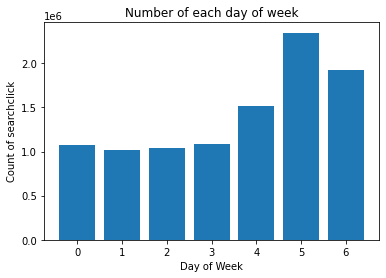

In [19]:
GG = pd.DataFrame(graph)
GG['day_of_week'] = [0,1,2,3,4,5,6]
plt.bar(GG['day_of_week'],GG['search_timestamp'])
plt.ylabel('Count of searchclick')
plt.xlabel('Day of Week')
plt.title('Number of each day of week')

In [20]:
adout = []
for i in search_request['day_of_week']:
    if i <=3 :
        dr =1
    elif i > 3:
        dr =2
    adout.append(dr)

In [21]:
search_request['password'] = adout

In [22]:
rt = search_request.groupby('password')['search_timestamp'].count()
table = pd.DataFrame(rt)
table['group'] = ['mon-thu','fri-sun']

Text(0.5, 1.0, 'Number of each day of week')

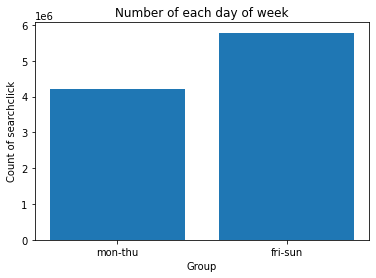

In [23]:
plt.bar(table['group'],table['search_timestamp'])
plt.ylabel('Count of searchclick')
plt.xlabel('Group')
plt.title('Number of each day of week')

In [24]:
times_pair = pd.concat([search2,search23])
times_pair

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long,times
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.2372,99.88,11:19:22.404000
6,6,3ecf13ba-be4d-4eb9-9374-a1cca09d1614,2018-06-22 11:26:40.836,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone8,4; iOS;...",ผัดไท,NaN,1m91ertp1g9a09agkl7dqtej30,17,12.4511,102.249,11:26:40.836000
15,15,abbf59dd-9631-4b3d-aa57-0bebda18b039,2018-06-22 11:48:00.258,"Wongnai/10.0 (iPhone10,6; iOS; 11.4; en_TH@cal...",yum & tum,6967.0,668o57pjfa8tpp19ob5de4be8t,14,13.7209,100.527,11:48:00.258000
16,16,4cda5a26-93a8-4e5c-85ce-7895646bde8c,2018-06-22 11:51:55.019,"Wongnai/8.17.5 (iPhone9,4; iOS; 11.4; en_TH@ca...",Godiva,71411.0,1b47msi6le9ci8nltjo817m443,10,13.7483,100.54,11:51:55.019000
36,36,7647c7f2-02d3-4475-b207-fb7ca3daba90,2018-06-18 11:48:21.744,"Wongnai/8.17.5 (iPhone9,4; iOS; 11.4; en_TH;)",ชานมไข่มุก square one,22432.0,5gbhu646p89t2rvm9t9026h6dj,11,13.719,100.52,11:48:21.744000
...,...,...,...,...,...,...,...,...,...,...,...
10003293,10004166,c2671f83-e92a-4252-9d21-2fd898271f9b,2018-06-15 23:09:43.328,okhttp/3.9.0;WongnaiAndroid 8.16.6;samsung;SM-...,NaN,NaN,22kfoqlo0u90ur84b19nt201lg,22,NaN,NaN,23:09:43.328000
10003310,10004183,bebb851e-1e8f-44db-8506-ccbb885beb79,2018-06-15 23:09:48.517,okhttp/3.9.0;WongnaiAndroid 8.16.6;samsung;SM-...,NaN,NaN,trmfmbb4v8i8qpj2c8ec1r73c,22,NaN,NaN,23:09:48.517000
10003318,10004191,ac9d3a26-d3fb-4525-aae1-19eed4436b72,2018-06-15 23:26:20.494,okhttp/3.9.0;WongnaiAndroid 8.16.6;samsung;SM-...,NaN,NaN,5s15ptlf328j795ha8abd28a9f,22,NaN,NaN,23:26:20.494000
10003337,10004210,7a6c52a4-3976-44e2-aa23-1349fd299454,2018-06-15 23:41:48.134,okhttp/3.9.0;WongnaiAndroid 8.16.6;samsung;SM-...,NaN,92807.0,116oc2qtqc9psptj9tu02e8tfl,22,NaN,NaN,23:41:48.134000


In [25]:
adout1 = []
for i in times_pair['times']:
    if i < time(hour=12,minute=00,second=00) :
        dr =1
    elif i > time(hour=12,minute=00,second=00) :
        dr =2
    adout1.append(dr)

In [26]:
times_pair['group_times'] = adout1
times_pair.head()
pair_times = times_pair.groupby('group_times')['search_timestamp'].count()
pt = pd.DataFrame(pair_times)
pt['group_times'] = ['11:00-11.59','23:00-23.59']

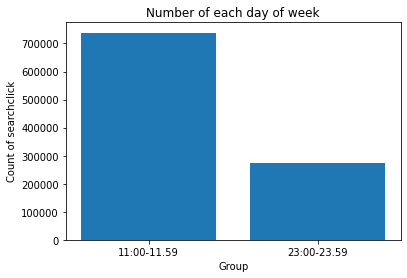

<function matplotlib.pyplot.legend>

In [27]:
plt.bar(pt['group_times'],pt['search_timestamp'])
plt.ylabel('Count of searchclick')
plt.xlabel('Group')
plt.title('Number of each day of week')
plt.show()
plt.legend

In [28]:
Group_webside = search_request.groupby('user_agent')['search_timestamp'].count().sort_values(ascending=False)
table_group_webside = pd.DataFrame(Group_webside)
table_group_webside[table_group_webside['search_timestamp']>100]

,search_timestamp
user_agent,
okhttp/3.9.0;WongnaiAndroid 8.16.6;samsung;SM-N950F,142490
okhttp/3.9.0;WongnaiAndroid 8.16.5.1;samsung;SM-N950F,125077
"Wongnai/10.0 (iPhone9,4; iOS; 11.4; th_TH;)",81524
okhttp/3.9.0;WongnaiAndroid 8.16.6;samsung;SM-N920C,74557
okhttp/3.9.0;WongnaiAndroid 8.16.7.1;samsung;SM-N950F,72845
...,...
"Wongnai/8.15.4 (iPhone8,1; iOS; 11.4; th_TH;)",101
"Wongnai/8.17 (iPhone9,4; iOS; 11.3.1; en_TH@calendar=gregorian;)",101
okhttp/3.9.0;WongnaiAndroid 8.16.7.1;HUAWEI;PE-TL10,101


In [29]:
 def get_cadio(data):
      cadio = {}
      for user_agent in data['user_agent']:
          for category in user_agent:
              category = category.lower()
              if category in cadio: # increase current category count
                cadio[category] = cadio[category] + 1
              else: # create new category in cadio object
                cadio[category] = 1
      return pd.DataFrame(cadio.values(), index= cadio.keys())

In [31]:
cadio = get_cadio(search_request).reset_index()
cadio.columns = ["category", "count"]
cadio.head()

KeyboardInterrupt: ignored

In [ ]:
new_genz = search_request[['search_timestamp','user_agent']]
new_genz

In [ ]:
spec = []
for i in new_genz['user_agent']:
    spel = i.split('/')
    spec.append(spel)

In [ ]:
new_genz['split'] = spec
new_genz.head()

In [ ]:
 def get_cadio(data):
      cadio = {}
      for split in data['split']:
          for category in split:
              category = category.lower()
              if category in cadio: # increase current category count
                cadio[category] = cadio[category] + 1
              else: # create new category in cadio object
                cadio[category] = 1
      return pd.DataFrame(cadio.values(), index= cadio.keys())

In [ ]:
cadio = get_cadio(new_genz).reset_index()
cadio.columns = ["category", "count"]
cadio_cut = cadio[cadio['count']>40000]
cadio_cut

In [ ]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

In [ ]:
sorted_category=  cadio_cut.sort_values(by="count")
trace = go.Bar(x=sorted_category['count'], y=sorted_category['category'], orientation="h", 
               marker_color='MediumPurple')
layout = go.Layout(title="Countries with most content", height=700, 
                   legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure([trace], layout=layout)
fig.show()

In [ ]:
country_codes = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
country_codes

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [ ]:
import matplotlib.pyplot as plt


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, yerr=men_std, label='Men')
ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
       label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

In [ ]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels, men_means, width, label='Men')
ax.barh(labels, women_means, width, left=men_means,label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

In [ ]:
times_pair.count()

In [ ]:
fig, ax = plt.subplots()

ax.bar(times_pair, men_means, width, yerr=men_std, label='Men')
ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means, label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

In [38]:
data = search_request['number_of_result']

In [39]:
data[data=='number_of_result']

1000016    number_of_result
Name: number_of_result, dtype: object

In [40]:
data = data.drop(1000016)

In [42]:
data = data.astype(int)

In [45]:
data = data[data<25]

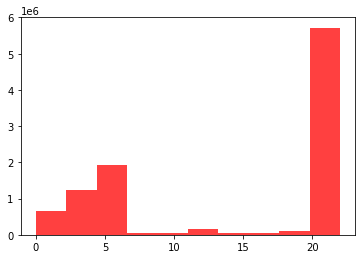

In [80]:
output = plt.hist(data,10,facecolor = 'red',alpha = 0.75)

In [73]:
one = data[data<20].count()
two = data[data>=20].count()

In [74]:
if one > two:
    woty = '>'
elif one < two:
    woty = '<'
elif one == two:
    woty = '='

In [75]:
print(f'{one} {woty} {two} ต่างกัน = {abs(one-two)}')

4287104 < 5717238 ต่างกัน = 1430134


In [76]:
output

(array([ 670293., 1247269., 1921441.,   51703.,   50609.,  167502.,
          36883.,   35914.,  105490., 5717238.]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <a list of 10 Patch objects>)

In [77]:
output[0][-1]

5717238.0

In [78]:
sum(output[0][:-1])

4287104.0

Tree map

In [81]:
!pip install squarify

In [82]:
import squarify

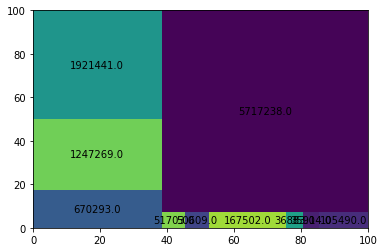

In [84]:
squarify.plot(output[0],value=output[0])

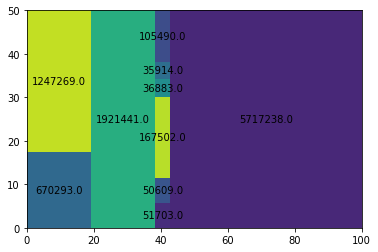

In [96]:
squarify.plot(output[0],value=output[0],norm_y=50)

## Radar char

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

In [98]:
data = {'client_id' : ['c1' , 'c2' , 'c3' , 'c4'],
         'cheese' : [2,5,4,3],
         'beer' : [2,1,3,5],
         'chicken' : [5,3,3,4],
        'bread' : [4,3,2,1],
       'coffee' : [2,3,5,3]}
df = pd.DataFrame.from_dict(data)
df

,client_id,cheese,beer,chicken,bread,coffee
0,c1,2,2,5,4,2
1,c2,5,1,3,3,3
2,c3,4,3,3,2,5
3,c4,3,5,4,1,3


In [101]:
attibutes = list(df.columns[1:])

In [102]:
values = df.mean().values.flatten().tolist()
values += values[:1] # repeat the first value to close the circular graph
angles = [n / float(len(attibutes)) * 2 * pi for n in range(len(attibutes))]
angles += angles[:1]

In [103]:
values

[3.5, 2.75, 3.75, 2.5, 3.25, 3.5]

In [104]:
angles

[0.0,
 1.2566370614359172,
 2.5132741228718345,
 3.7699111843077517,
 5.026548245743669,
 0.0]

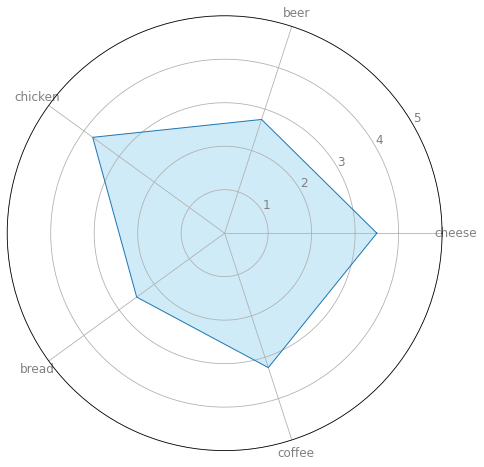

In [105]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], attibutes, color='grey', size=12)
plt.yticks(np.arange(1, 6), ['1', '2', '3', '4', '5'],
           color='grey', size=12)
plt.ylim(0, 5)
ax.set_rlabel_position(30)
 
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'skyblue', alpha=0.4)

plt.show()